제안 1: 고객 충성도 예측
- 문제 정의: 고객의 계약 유형, 연체 기록, 신용 등급, 마일리지 등을 바탕으로 고객의 충성도(예: 장기 계약 유지 여부)를 예측합니다.
- 배경: 충성도 높은 고객을 식별하여 타겟 마케팅 전략을 수립하고, 서비스 개선을 통해 고객 유지율을 높일 수 있습니다.


In [1]:
# channel
# Term
# product
# amount
# age
# Mileage

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl # 한글 폰트 설정 (NanumGothic) 
mpl.rcParams['font.family'] = 'NanumGothic'
mpl.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지
import pandas as pd 
rentAcar = pd.read_csv('../../datasets/LetalCarOfContractType.csv')
rentAcar.head()

,id,type_of_contract,type_of_contract2,channel,datetime,Term,payment_type,product,amount,state,overdue_count,overdue,credit rating,bank,cancellation,age,Mileage
0,66758234,렌탈,Normal,서비스 방문,2019-10-20,60,CMS,K1,96900,계약확정,0,없음,9.0,새마을금고,정상,43.0,1862.0
1,66755948,렌탈,Extension_Rental,서비스 방문,2019-10-20,60,카드이체,K1,102900,계약확정,0,없음,2.0,현대카드,정상,62.0,2532.0
2,66756657,렌탈,Normal,홈쇼핑/방송,2019-10-20,60,CMS,K1,96900,계약확정,0,없음,8.0,우리은행,정상,60.0,2363.0
3,66423450,멤버십,TAS,렌탈재계약,2019-10-20,12,CMS,K1,66900,계약확정,0,없음,5.0,농협은행,정상,60.0,2449.0
4,66423204,멤버십,TAS,렌탈재계약,2019-10-20,12,CMS,K1,66900,해약확정,12,있음,8.0,농협은행,해약,51.0,1942.0


In [3]:
# rentAcar.info()
# iloc을 사용하여 위치 기반으로 선택
editCol = rentAcar.iloc[:, [1, 3, 5, 7, 8, 9, 12, 14, 15, 16]]
editCol.head()

,type_of_contract,channel,Term,product,amount,state,credit rating,cancellation,age,Mileage
0,렌탈,서비스 방문,60,K1,96900,계약확정,9.0,정상,43.0,1862.0
1,렌탈,서비스 방문,60,K1,102900,계약확정,2.0,정상,62.0,2532.0
2,렌탈,홈쇼핑/방송,60,K1,96900,계약확정,8.0,정상,60.0,2363.0
3,멤버십,렌탈재계약,12,K1,66900,계약확정,5.0,정상,60.0,2449.0
4,멤버십,렌탈재계약,12,K1,66900,해약확정,8.0,해약,51.0,1942.0


In [4]:
editCol['type_of_contract'].unique()

array(['렌탈', '멤버십', nan], dtype=object)

In [5]:
editCol['channel'].unique()

array(['서비스 방문', '홈쇼핑/방송', '렌탈재계약', '렌탈총판', '전자랜드', '홈플러스', '일반', '영업방판',
       '하이마트', '이마트', '홈쇼핑/인터넷', 'R빌리미', 'R유통사', 'R인터넷', 'R관리방판',
       'R농협인터넷몰', 'R농협', 'R법인', 'R렌탈운영', 'R법인그룹'], dtype=object)

In [6]:
editCol['Term'].unique()

array([60, 12, 36, 39])

In [7]:
editCol['product'].unique()

array(['K1', 'K3', 'K2', 'K4', 'K6', nan, 'K5'], dtype=object)

In [8]:
# editCol['amount'].unique()

In [9]:
editCol['state'].unique()

array(['계약확정', '해약확정', '기간만료', '해약진행중'], dtype=object)

In [10]:
editCol['credit rating'].unique()

array([ 9.,  2.,  8.,  5.,  1.,  7., nan,  3.,  6.,  4., 10.,  0.])

In [11]:
editCol['cancellation'].unique()

array(['정상', '해약', nan], dtype=object)

In [12]:
# editCol['age'].unique()

In [13]:
# editCol['Mileage'].unique()

In [14]:
# type_of_contract 	
# channel	
# Term	
# product	
# amount	X
# state	
# credit rating	
# cancellation	
# age	X
# Mileage X



contractCond렌탈 = 'type_of_contract == "렌탈"'
contractCond멤버십 = 'type_of_contract == "멤버십"'

termCond12 = 'Term == "12"'
termCond36 = 'Term == "36"'
termCond39 = 'Term == "39"'
termCond60 = 'Term == "60"'

productCondK1 = 'product == "K1"'
productCondK2 = 'product == "K2"'
productCondK3 = 'product == "K3"'
productCondK4 = 'product == "K4"'
productCondK5 = 'product == "K5"'
productCondK6 = 'product == "K6"'
productCondNan = 'product == "nan"'

stateCond계약확정 = 'state == "계약확정"'
stateCond해약확정 = 'state == "해약확정"'
stateCond기간만료 = 'state == "기간만료"'
stateCond해약진행중 = 'state == "해약진행중"'


cancelCond정상 = 'cancellation == "정상"'
cancelCond해약 = 'cancellation == "해약"'
cancelCondNan = 'cancellation == "nan"'

ageCond10s = ' age <= 19'
ageCond20s = ' 20 <= age <= 29'
ageCond30s = ' 30 <= age <= 39'
ageCond40s = ' 40 <= age <= 49'
ageCond50s = ' 50 <= age <= 59'
ageCond60s = ' 60 <= age <= 69'
ageCond70s = ' 70 <= age <= 79'
ageCond80s = ' 80 <= age <= 89'
ageCond90s = ' 90 <= age <= 99'

계약 기간별 고객 충성도:
cancellation         정상         해약
Term                              
12            80.654989  19.345011
36            98.210024   1.789976
39            99.215686   0.784314
60            99.252290   0.747710


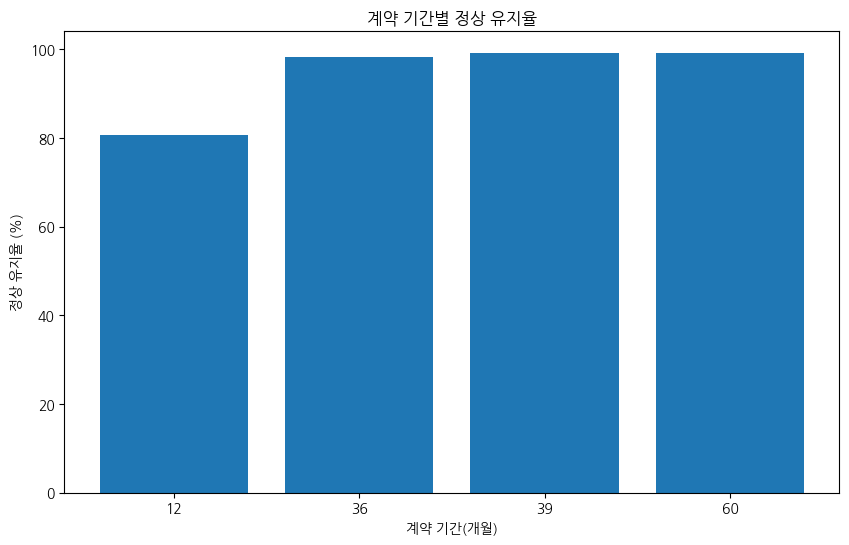

In [ ]:
# 계약 기간별 해약률 분석
term_loyalty = pd.crosstab(editCol['Term'], editCol['cancellation'], normalize='index') * 100
print("계약 기간별 고객 충성도:")
print(term_loyalty)

# 시각화
plt.figure(figsize=(10, 6))

# x축을 위한 위치값 생성 (0부터 시작하는 일정한 간격의 인덱스)
x_positions = range(len(term_loyalty.index))

# 막대 그래프 그리기 - x위치값 사용
plt.bar(x_positions, term_loyalty['정상'])

# x축 레이블 설정 - 실제 계약기간 값을 레이블로 사용
plt.xticks(x_positions, term_loyalty.index)

plt.title('계약 기간별 정상 유지율')
plt.xlabel('계약 기간(개월)')
plt.ylabel('정상 유지율 (%)')

plt.show()



신용등급별 계약 상태:
state           계약확정  기간만료  해약진행중  해약확정
credit rating                          
0.0               60     0      0     0
1.0            10685     1      2    90
2.0             8088     2      2   136
3.0             4856     1      0   140
4.0             5260     3      2   114
5.0             4240     5      1    71
6.0             3751     5      3    59
7.0             2663     5      2    47
8.0             1504     5      0    33
9.0              626     0      0    13
10.0              45     0      0     1


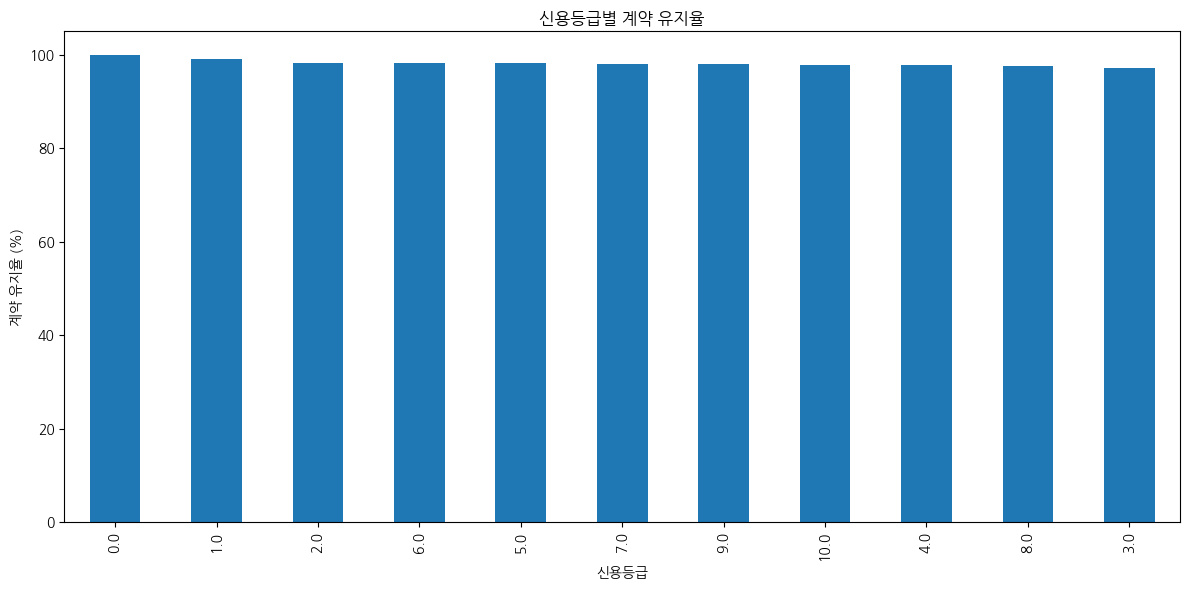

In [16]:
# 신용등급별 계약 유지 현황
credit_loyalty = pd.crosstab(editCol['credit rating'], editCol['state'])
print("\n신용등급별 계약 상태:")
print(credit_loyalty)

# 시각화
plt.figure(figsize=(12, 6))
credit_loyalty_pct = credit_loyalty.div(credit_loyalty.sum(axis=1), axis=0) * 100
credit_loyalty_pct['계약확정'].sort_values(ascending=False).plot(kind='bar')
plt.title('신용등급별 계약 유지율')
plt.xlabel('신용등급')
plt.ylabel('계약 유지율 (%)')
plt.tight_layout()
plt.show()

# 

In [17]:
# 충성 고객 정의: 
# 1. 장기 계약(36개월 이상)
# 2. 정상 상태 유지
# 3. 해약하지 않은 고객

loyal_customers = editCol[
    (editCol['Term'].isin(['36', '39', '60'])) & 
    (editCol['state'] == '계약확정') & 
    (editCol['cancellation'] == '정상')
]

# 충성 고객의 특성 분석
print("\n충성 고객 연령대 분포:")
print(loyal_customers['age'].describe())

# 충성 고객의 선호 상품
loyal_product_dist = loyal_customers['product'].value_counts()
print("\n충성 고객 선호 상품:")
print(loyal_product_dist)

# 충성 고객의 채널 분포
loyal_channel_dist = loyal_customers['channel'].value_counts()
print("\n충성 고객 유입 채널:")
print(loyal_channel_dist)


충성 고객 연령대 분포:
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: age, dtype: float64

충성 고객 선호 상품:
Series([], Name: count, dtype: int64)

충성 고객 유입 채널:
Series([], Name: count, dtype: int64)



계약 상태별 평균 마일리지:
state
계약확정     1967.849484
기간만료     2120.576923
해약진행중    1893.250000
해약확정     1967.667665
Name: Mileage, dtype: float64


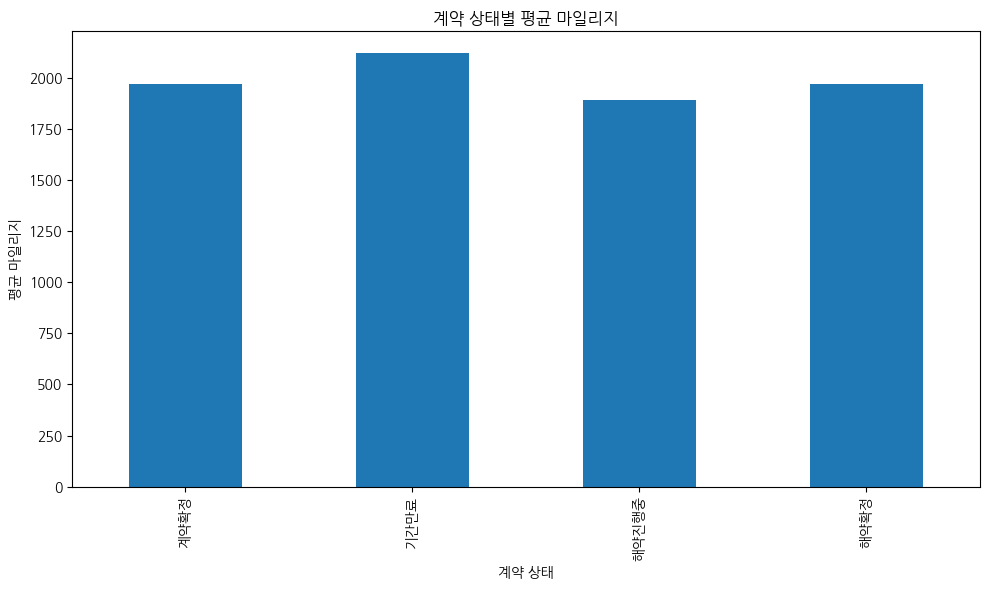

In [18]:
# 계약 상태별 평균 마일리지 비교
mileage_by_state = editCol.groupby('state')['Mileage'].mean()
print("\n계약 상태별 평균 마일리지:")
print(mileage_by_state)

# 시각화
plt.figure(figsize=(10, 6))
mileage_by_state.plot(kind='bar')
plt.title('계약 상태별 평균 마일리지')
plt.xlabel('계약 상태')
plt.ylabel('평균 마일리지')
plt.tight_layout()
plt.show()

In [19]:
# 충성 고객의 종합적 특성
loyal_profile = {
    '연령대별 분포': pd.cut(loyal_customers['age'], 
                      bins=[0, 19, 29, 39, 49, 59, 69, 79, 89, 99],
                      labels=['10대', '20대', '30대', '40대', '50대', '60대', '70대', '80대', '90대']
                     ).value_counts(),
    '선호 계약유형': loyal_customers['type_of_contract'].value_counts(),
    '평균 마일리지': loyal_customers['Mileage'].mean(),
    '주요 유입채널': loyal_customers['channel'].value_counts().head()
}

print("\n=== 충성 고객 프로파일 ===")
for key, value in loyal_profile.items():
    print(f"\n{key}:")
    print(value)


=== 충성 고객 프로파일 ===

연령대별 분포:
age
10대    0
20대    0
30대    0
40대    0
50대    0
60대    0
70대    0
80대    0
90대    0
Name: count, dtype: int64

선호 계약유형:
Series([], Name: count, dtype: int64)

평균 마일리지:
nan

주요 유입채널:
Series([], Name: count, dtype: int64)
